<a href="https://colab.research.google.com/github/johntango/Cert3/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--BOOK_INFORMATION-->
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

#Are rich people are happy?
$\text{The Harvard MBA student said only 10% of happy people are rich. }$

# Bayes Theorem - Background 
$\text{In set theory the intersection of A with B is written }$
$$ A \cap B $$
$\text{Lets suppose we are dealing with events A and B. So the intersection represents that both events A and B have occured.}$
$\text{Consider that this can happen two ways. First A occurs and then B or first B occurs and then A.} $

# Probability Notation

$\text{The probability of event A is written } P(A) $  
$\text{The probability of event B is written } P(B) $

$\text{The probability of B given that A has occured is written } P(B|A) $
$\text{We say this is the "conditional" probability of B given A } $
$\text{So the probability of A and B is: }  P(B|A) P(A) $
$\text{But this must be the same B and A:  }  P(A|B) P(B) $
$\text{and both are} A \cap B  $

$$P(A | B) P(B) = P(B | A) P(A) = A \cap B$$
$\text{Rearranging this we get:} $
$$P(B | A) = \frac{P(A | B) P(B)}{P(A)} $$



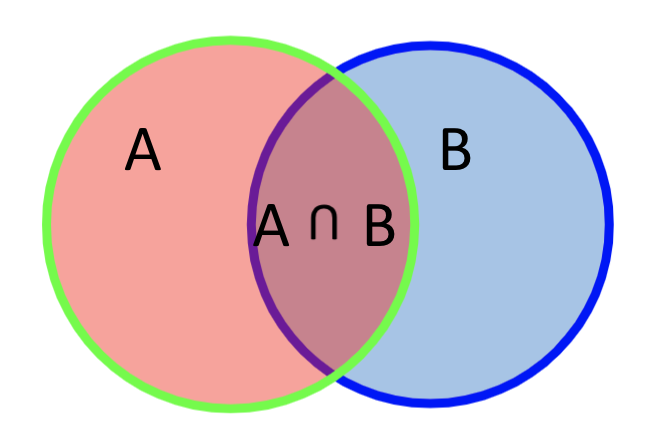

#Exercise - What percentage of rich people are happy?
$\text{The Harvard MBA student said only 10% of happy people are rich. So it souunds like being rich is not so great. }$. 
$\text{However, hearing this the MIT student thought for a moment and then Googled the following: } $
$\text{Of all the population what percentage are happy? (Google answered: 40% are happy) }$
$\text{What percentage of all people are rich? (Google answered: 5%)} $  
$\text{What did the MIT student conclude?} $




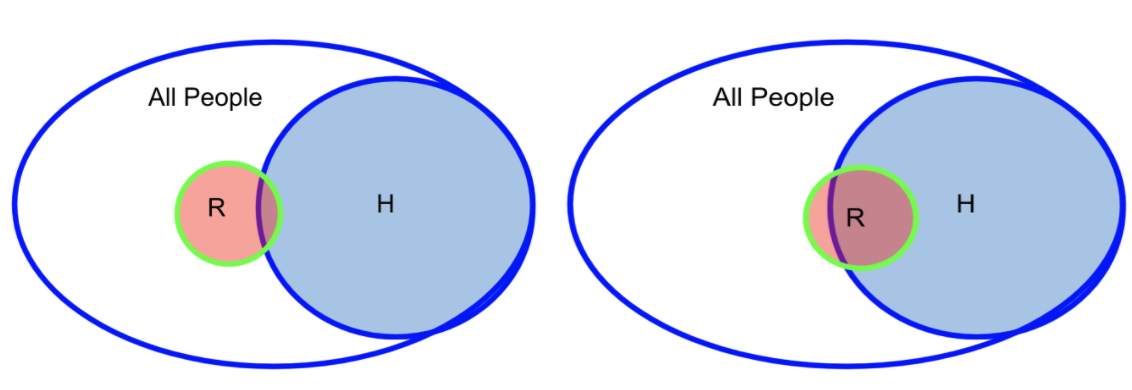

### The Prior Probability (Before) 

$\text{Suppose we ask what is the probability of B ? }$
$\text{You would answer } P(B) $

### The Posterior Probability (After) 

$\text{Suppose now we see that A has occured and again we ask: What is the probability of B given that we have seen A already? }$
$\text{You would answer } P(B|A) $  
$\text{Given the new information we now say the "posterior" probability of B is:} $  
$$ \frac{ P(B | A) P(A)}  {P(B)} $$



# What percentage of Rich People are Happy
$\text{10% of Happy people are Rich }$  
$\text{40% of people are Happy }$  
$\text{ 5% of people Rich} $  
$\text {Given that we are rich (R) what is the probability we are happy (H) ie. We want to calculate:}  P(H|R) $
$$ P(H|R) = \frac{ P(R | H) P(H)} {P(R)} $$
$$ P(H|R) = \frac{0.1 * 0.4} {0.05} = 0.8 $$

$\text{Thus, Bayes tells us 80% of Rich people are Happy} $
$\text{Do we have volunteers to test this? } $   

## Labels and Features
$\text{In machine learning we want to know the probablity of a "Label" given that some "feature" has been seen. We can write this as }$
$$ P(L | feature) = \frac{P(feature | L) P(L)}{P(feature)} $$

$\text{For example, suppose we want to label an email as either SPAM or Normal } $
$$L_{1} = SPAM ; L_{2} = NORMAL$$ 

$\text{Our "Features" are the words in the email. eg "hello", "friend", etc }$



## Bayesian Classification

So given an email, we are trying to decide between two labels. One way to make this decision is to compute the ratio of the "posterior" probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$


All we need now is some model by which we can compute $P({\rm features}~|~L_i)$ for each label.
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "naive Bayes" comes in: if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

We begin with the standard imports:

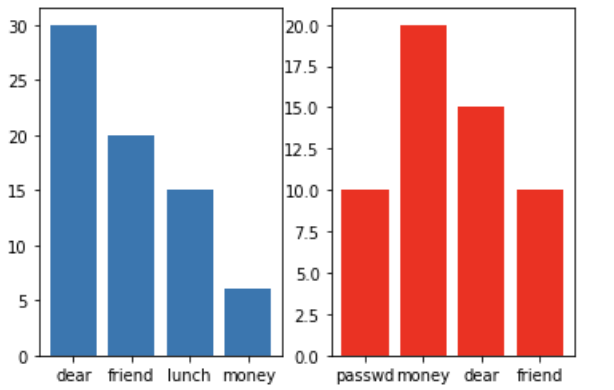


$\text{The "PRIOR" for Normal Email } P(N) = 30/50 = 0.6 $
$\text{The "PRIOR" for SPAM Email } P(S) = 20/50 = 0.4 $
### For Label Normal
$ P("dear" | N) = 1.0 $ \\
$P("friend" | N) = 2/3 $ \\
$ P("lunch" | N) = 1/2 $ \\
$ P("money" | N) = 1/5 $
### For Label SPAM
$P("password" | S) = 0.5 $ \\
$P("money" | S) = 1.0 $ \\
$ P("dear" | S) = 3/4 $ \\
$ P("friend" | S) = 1/2 $

### Now applyiing Bayes Rule
$$
\frac{P(N ~|~{\rm "dear"})}{P(S~|~{\rm "dear"})} = \frac{P({\rm "dear"}~|~N)}{P({\rm "dear"}~|~S)}\frac{P(N)}{P(S)} = 0.6/(6/20) = 2
$$
$$
\frac{P(N ~|~{\rm "money"})}{P(S~|~{\rm "money"})} = \frac{P({\rm "money"}~|~N)}{P({\rm "money"}~|~S)}\frac{P(N)}{P(S)} == (3/25)/(2/5) = 3/10
$$


## Problem with words not in common
$\text{If we have words that are not in common, one solution is to add 1 instance of the word to the label, as shown below)}$
### For Label Normal we add one occurance
$ P("password" | N) = 1/30 = 0.03 $ \\

### For Label SPAM we add one occurance
$ P("lunch" | S) = 1/20 = 0.05 $ \\


# Exercise - Calculate the posterior relative probability for an email with password in it. 



$\text {The relative probability of an email containing the word password being Normal is low ie it is almost certainly SPAM}$ \\
$$
\frac{P(N ~|~{\rm "password"})}{P(S~|~{\rm "password"})} = \frac{P({\rm "password"}~|~N)}{P({\rm "password"}~|~S)}\frac{P(N)}{P(S)} = (1/30*3/5) / (1/2*2/5) = 1/10
$$


# Exercise - What is the probability of an email containing "money" and "lunch" being Normal?
$$
\frac{P(N ~|~{\rm f_1,f_2})}{P(S~|~{\rm f_1,f_2})} = \frac{P({\rm f_1}~|~N)*P({\rm f_2}~|~N)}{P({\rm f_1}~|~S)*P({\rm f_2}~|~S)}\frac{P(N)}{P(S)} = (1/30*3/5) / (1/2*2/5) = 1/10
$$


#Exercise - Calculate the posterior relative probability for an email with the words "password" and "money" in it.


$$
\frac{P(N ~|~{\rm "password","money"})}{P(S~|~{\rm "password","money"})} = \frac{P({\rm "password"}~|~N)*P({\rm "money"}~|~N)}{P({\rm "password"}~|~S)*P({\rm "money"}~|~S)}\frac{P(N)}{P(S)} = (1/30*1/5*3/5)/(1/2*2/5) = 1/20 = 0.05
$$



-








-

## Naive Bayesian 

$\text{What do we do when multiple features are present. The Naive Bayes assumption is that all features are independent}$
$\text{ of each other. This means the probability of seeing any feature is not dependent on any other being present. }$
$\text{Thus, the probability of seeing features } \\  P(f_1, f_2) = P(f_1)*P(f_2)$  

$\text {For many features we write this as a product}$
$$
\frac{P(N ~|~{\rm f_1,f_2...f_n})}{P(S~|~{\rm f_1,f_2...f_n})} = \frac{\prod_{i}{P(\rm f_i}~|~N)}{\prod_{i}P({\rm f_i}~|~S))}\frac{P(N)}{P(S)}
$$




-

# Problem - Computer underflow when multiplying 1000s of small numbers
$\text {We can overcome the "underflow" problem by using log probabilities}$
$$ \log_e (a.b) = \log_e(a) + \log_e(b) $$

$$
P(N ~|~{\rm f_1,f_2...f_n}) = \sum_{i}{\log_e(P(\rm f_i}~|~N)). \log_eP(N)
$$


# MAP Maximum a Posteriori for Machine Learning
Maximum a Posteriori or MAP for short is a Bayesian-based approach to estimating a distribution and model parameters that best explain an observed dataset. If you want to go deeper into this topic you can follow this 
 [link text](https://machinelearningmastery.com/maximum-a-posteriori-estimation/#:~:text=Maximum%20a%20Posteriori%20or%20MAP,best%20explain%20an%20observed%20dataset.&text=MAP%20involves%20calculating%20a%20conditional,or%20belief%20about%20the%20model.
)

# Probability of Spam


Text(0.5, 1.0, 'Normal Email')

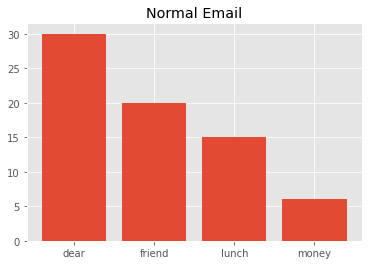

In [58]:
import matplotlib.pyplot as plt
import numpy as np
names = ['dear','friend','lunch','money']
freq = [30,20,15,6]
plt.bar(names,freq)
plt.title("Normal Email")



Text(0.5, 1.0, 'SPAM Email')

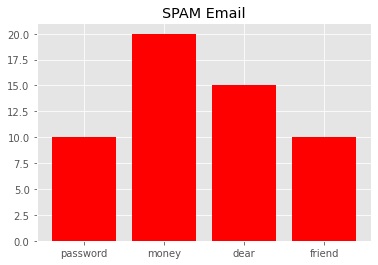

In [59]:
names = ['password','money','dear','friend']
freq = [10,20,15,10]
plt.bar(names,freq,color='red')
plt.title("SPAM Email")

# Exercise - Gaussian Naive Bayes
### Now we assume our features are Gaussian distributions  

# Probability of Gender (Male or Female)

Training Data - Assumption of Gaussian Distributions \\

|Person: |Height:|Weight:|FootSize:
|---|---|---|---|
| Male| 6   | 180   | 12 | \\
| Male | 5.92   | 190   | 11|  \\
| Male| 5.58   |  170   |12| \\
| Male  | 5.91|  165   |10| \\
| Female| 5.0  |100   |6| \\
| Female| 5.5   |  150   |8 | \\
| Female  | 5.42   |  130   |7| \\
| Female  | 5.75   |  150   |9| \\

$\text{The  training set. We assume Gaussian distributions, with mean and unbiased sample variance:}$




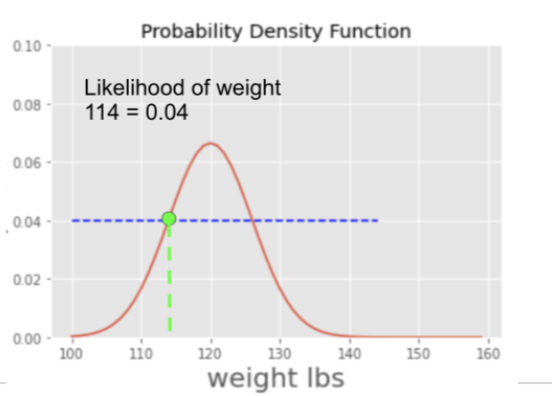

# Exercise - Step 1: Write code to calculate the mean and unbiased variance for each of the 6 Gaussian distributions

### Test Data

|Person: |Height:|Weight:|FoorSize:
|---|---|---|---|
| Unknown| 6   | 130   | 8 | \\

#Exercise - Step 2 Hint
### Given the test person's height calculate the "likelihood" of this person being Male and Female using the Probability Density Function (PDF) value of the Male or Female Height Gaussian. The example code below is for mean=6 variance = 1  and gives the PDF for a person with height 5.9  We would interpret this as the probability of seeing this height if the gender was X.
$$
PDF  = P({\rm "Height"}~|~X) 
$$

$\text{The insight now is to use the Probability Density Functions as a measure of the likelihood of seeing a sample. }$
$\text{Using this we can combine the probabilities for Height, Weight and Shoe Size as follows:  }$

$$
Posterior Female  = P({\rm "Height"}~|~F) * P({\rm "Weight"}~|~F)* P({\rm "FootSz"}~|~F) * P({\rm "F"})
$$
$$
Posterior Male  = P({\rm "Height"}~|~M) * P({\rm "Weight"}~|~M)* P({\rm "FootSz"}~|~M) * P({\rm "M"})
$$

In [62]:
import scipy 
from scipy.stats import norm
print(f'pdf: {norm(6, 1).pdf(5.8)}')


pdf: 0.3910426939754559


In [67]:
# Training Data for Height, Weight and FootSize

male = []
male.append(np.array([6.0,5.92,5.58,5.91]))
male.append(np.array([180,190,170,165]))
male.append(np.array([12,11,12,10]))
female = []
female.append( np.array([5.0,5.5,5.42,5.75]))
female.append(np.array([100,150,130,150]))
female.append(np.array([6,8,7,9]))

means = []
vars = []
print("male")
for item in male  :
  mean = np.mean(item)
  var = np.var(item, ddof=1)  #unbiased estimate
  print(f'mean: {mean},var: {var}')
  means.append(mean)
  vars.append(var)

print("female")
for item in female  :
  mean = np.mean(item)
  var = np.var(item, ddof=1)
  print(f'mean: {mean},var: {var}')
  means.append(mean)
  vars.append(var)



male
mean: 5.8525,var: 0.03462499999999999
mean: 176.25,var: 122.91666666666667
mean: 11.25,var: 0.9166666666666666
female
mean: 5.4175,var: 0.097225
mean: 132.5,var: 558.3333333333334
mean: 7.5,var: 1.6666666666666667
malePosterior: 3.2405009064686856e-09
femalePosterior: 1.0767782122749643e-11
Probability of Male/Female 300.9441377553799


In [75]:
import scipy 
from scipy.stats import norm
malePosterior = norm(means[0], vars[0]).pdf(6) * \
                norm(means[1], vars[1]).pdf(130) * \
                norm(means[2], vars[2]).pdf(8)
femalePosterior = norm(means[3], vars[3]).pdf(6) * \
                norm(means[4], vars[4]).pdf(130) * \
                norm(means[5], vars[5]).pdf(8)
print(f'malePosterior: {malePosterior}')
print(f'femalePosterior: {femalePosterior}')
print(f'Probability of Male/Female {malePosterior/femalePosterior}')


malePosterior: 3.2405009064686856e-09
femalePosterior: 1.0767782122749643e-11
Probability of Male/Female 300.9441377553799


In [74]:
def pdf(mean,var, feature):
  s2 = 2* var * var
  mu2 = (feature-mean)*(feature-mean)
  const1 = 1/np.sqrt((np.pi*s2))
  r = const1*np.exp(-mu2/s2)
  return r


print(norm(means[0], vars[0]).pdf(6) )
print(norm(means[1], vars[1]).pdf(130) )
print(norm(means[2], vars[2]).pdf(8))
print(norm(means[3], vars[3]).pdf(6))
print(norm(means[4], vars[4]).pdf(130))
print(norm(means[5], vars[5]).pdf(8))

print('-----')
print(pdf(means[0], vars[0], 6)) 
print(pdf(means[1], vars[1],130)) 
print(pdf(means[2], vars[2],8))
print(pdf(means[3], vars[3],6))
print(pdf(means[4], vars[4],130))
print(pdf(means[5], vars[5],8))

0.0013211514128893935
0.003023817554282929
0.000811155224593965
6.585610471133988e-08
0.0007145163245782472
0.22883268927631448
-----
0.0013211514128893909
0.0030238175542829284
0.0008111552245939644
6.585610471133988e-08
0.0007145163245782471
0.22883268927631445


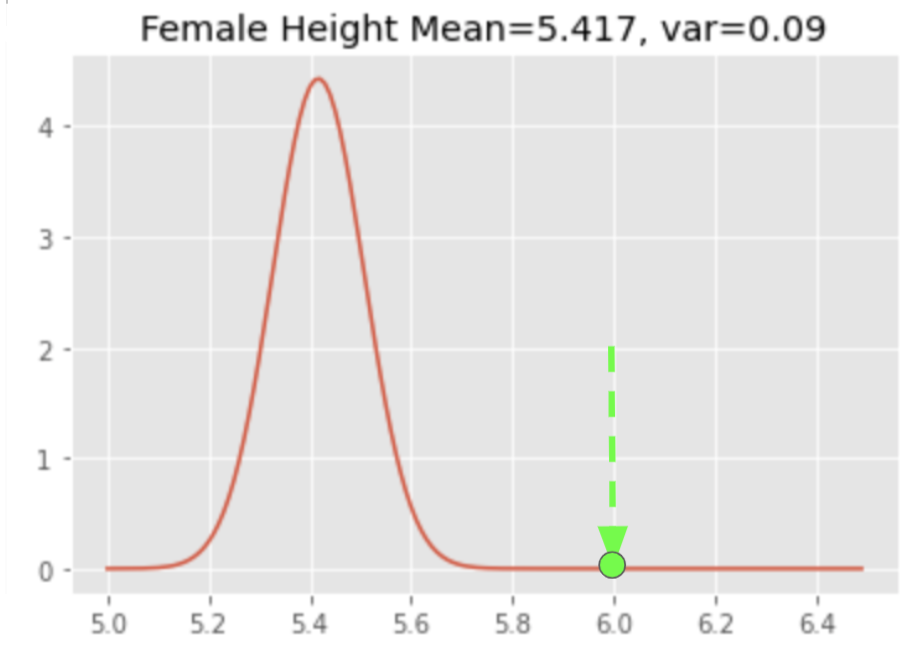


|Person: |Height:Mean|Height:Var|Weight:Mean|Weight:Var|FootSz:Mean|FootSz:Var|
|---  |--- | ---|--- | ---|--- | ---|
| Male   |5.852   |  0.034  |176.25  |122.91 |11.25 | 0.916 | 
| Female | 5.417   | 0.097  |132.5|558.33 |7.5 |1.66| 



Text(0.5, 1.0, 'Female Height Mean=5.417, var=0.09')

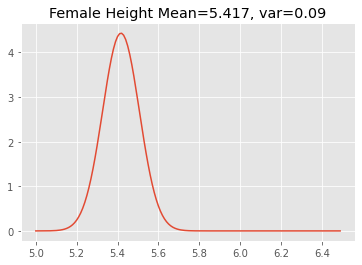

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
x = np.arange(5,6.5, 0.01) # range of x in spec
y = norm.pdf(x, 5.417,0.09)
plt.plot(x,y)
plt.title("Female Height Mean=5.417, var=0.09")


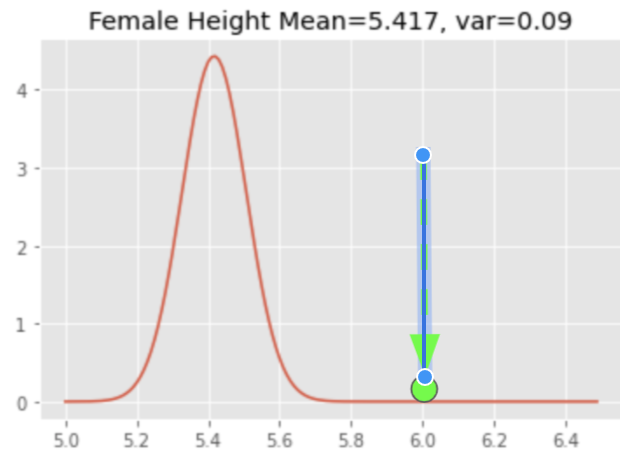

# Probability of Liking James Bond Movie

20 people who like James Bond: Prior Probability P(Yes) = 0.4 \\

|PopCorn: |Soda:|Candy:|
|---|--- |---|
| 40    | 80   | 33   | \\
| 50     | 60   |  45   | \\
| 35    | 100   |  66   |\\

30 people who do not like James Bond: Prior Probability P(No) = 0.6 \\

|PopCorn: |Soda:|Candy:|
|---    |--- | ---|
| 30      | 40   | 80   | \
| 20     | 60   |  90   | \\
| 25     | 30   |  85   |



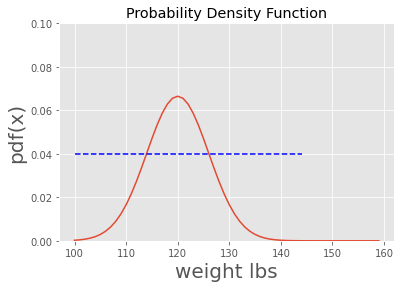

In [38]:
from matplotlib import collections as matcoll
plt.style.use('ggplot')
fig, ax = plt.subplots()
x= np.arange(100,160,)
lines = ax.plot(x, norm.pdf(x,loc=120,scale=6))
ax.set_ylim(0,0.1) # range
ax.set_xlabel('weight lbs',fontsize=20) # set x label
ax.set_ylabel('pdf(x)',fontsize=20,rotation=90) # set y label



xs = np.arange(100,145,1)
horiz = np.array( [0.04 for i in range(len(xs))])
plt.plot(xs, horiz, 'b--') 
plt.title("Probability Density Function")
plt.show()

NameError: ignored

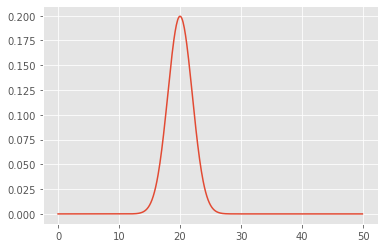

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
x = np.arange(0,50, 0.1) # range of x in spec
x1 = np.arange(50,100, 0.1) # range of x in spec
y = norm.pdf(x, 20,2)
y2 = norm.pdf(x,70,2)
y3 = norm.pdf(x1,40,2)
plt.plot(x,y)
plt.plot(x,y1)


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes.
In this classifier, the assumption is that *data from each label is drawn from a simple Gaussian distribution*.
Imagine that you have the following data:

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution. The result of this naive Gaussian assumption is shown in the following figure:

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

We see a slightly curved boundary in the classifications—in general, the boundary in Gaussian naive Bayes is quadratic.

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the ``predict_proba`` method:

In [ ]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

## Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.
Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

### Example: Classifying Text

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
We discussed the extraction of such features from text in [Feature Engineering](05.04-Feature-Engineering.ipynb); here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [ ]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
print(train.data[5])

###Text Features
A common need in feature engineering is to convert text to a set of representative numerical values. For example, most automatic mining of social media data relies on some form of encoding the text as numbers. One of the simplest methods of encoding data is by word counts: you take each snippet of text, count the occurrences of each word within it, and put the results in a table.

For example, consider the following set of three phrases

In [ ]:
text = ['queen of peace',
          'open mind',
          'peace of mind']

For a vectorization of this data based on word count, we could construct a column representing the word "problem," the word "evil," the word "horizon," and so on.
While doing this by hand would be possible, the tedium can be avoided by using Scikit-Learn's ``CountVectorizer``:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(text)
X

The result is a sparse matrix recording the number of times each word appears; it is easier to inspect if we convert this to a DataFrame with labeled columns:

In [ ]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

There are some issues with this approach, however: the raw word counts lead to features which put too much weight on words that appear very frequently, and this can be sub-optimal in some classification algorithms. One approach to fix this is known as term frequency-inverse document frequency (TF–IDF) which weights the word counts by a measure of how often they appear in the documents. The syntax for computing these features is similar to the previous example:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(text)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.
For this we will use the TF-IDF vectorizer (discussed in [Feature Engineering](05.04-Feature-Engineering.ipynb)), and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [ ]:
predict_category('sending a payload to the ISS')

In [ ]:
predict_category('discussing islam vs atheism')

In [ ]:
predict_category('determining the screen resolution')

## When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.
If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.
If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.

Naive Bayes classifiers tend to perform especially well in one of the following situations:

- When the naive assumptions actually match the data (very rare in practice)
- For very well-separated categories, when model complexity is less important
- For very high-dimensional data, when model complexity is less important

The last two points seem distinct, but they actually are related: as the dimension of a dataset grows, it is much less likely for any two points to be found close together (after all, they must be close in *every single dimension* to be close overall).
This means that clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions, assuming the new dimensions actually add information.
For this reason, simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.